In [1]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score

In [2]:
df = pd.read_pickle(r'D:\JupyterNotebook\DataProcess\preprocess_SWsastrawi_stemming.pkl')
dfNo = pd.read_pickle(r'D:\JupyterNotebook\DataProcess\preprocess_SWsastrawi_nostemming.pkl')

In [3]:
def split(strt,fnsh,df):
    X_test = df['text'].iloc[strt:fnsh]
    y_test = df['label'].iloc[strt:fnsh].astype('int')
    df.drop(df.index[strt:fnsh])
    X_train = df['text']
    y_train = df['label'].astype('int')    
    return X_train, X_test, y_train, y_test

In [4]:
def classifier(df,distance_name,k_neighbor):
    print("Nama distance=",distance_name)
    print("Jumlah K tetangga=",k_neighbor)
    spl = [0,108,216,324,432,540,648,756,864,972,1080]
    tempspl = []
    i = 0
    akurasimax=0
    while (i<len(spl)-1):
#         --------------Split-------------------
        if len(spl)-2 != len(tempspl):
            X_train, X_test, y_train, y_test = split(spl[i],spl[i+2],df)
            tempspl.append(spl[i])
    #   ketika array[i+2] == null (looping terakhir)
        elif (len(spl)-len(tempspl)) == 2:
    #       split last and first
            X_test1 = df['text'].iloc[spl[i]:spl[i+1]]
            y_test1 = df['label'].iloc[spl[i]:spl[i+1]].astype('int')
            X_test2 = df['text'].iloc[tempspl[0]:tempspl[1]]
            y_test2 = df['label'].iloc[tempspl[0]:tempspl[1]].astype('int')
    #       concat last and first
            X_test = pd.concat([X_test1, X_test2], axis=0)
            y_test = pd.concat([y_test1, y_test2], axis=0)
    #       split except last and first
            X_train = df['text'].iloc[tempspl[1]:tempspl[len(tempspl)-1]]
            y_train = df['label'].iloc[tempspl[1]:tempspl[len(tempspl)-1]].astype('int')
        
#         --------------Pembobotan TF-ID-------------------
#         vectorizer = TfidfVectorizer(min_df=3, dtype=np.double, norm='l2', sublinear_tf=True)
        vectorizer = TfidfVectorizer()
        X_train = vectorizer.fit_transform(X_train)
        X_test = vectorizer.transform(X_test)

#         --------------CLasifier KNN-------------------        
        modelknn = KNeighborsClassifier(n_neighbors=k_neighbor, weights='uniform', metric=distance_name)
        modelknn.fit(X_train,y_train)
        y_pred = modelknn.predict(X_test)
#         print(classification_report(y_test,y_pred))
        akurasi = modelknn.score(X_test, y_test)
        precision = precision_score(y_test,y_pred,average='weighted', labels=np.unique(y_pred))
        recall = recall_score(y_test, y_pred, average='weighted')
        f1score = f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))
        print("Fold ke-",i+1,"Akurasi =","{:.4f}".format(akurasi),
              "Precision =","{:.4f}".format(precision),
              "Recall =","{:.4f}".format(recall),
              "F1-Score =","{:.4f}".format(f1score))
        if (akurasi >= akurasimax):
            akurasimax = akurasi
            foldke = i+1
        i+=1
    print("Akurasi terbaik adalah",akurasimax,"pada fold ke-",foldke)
    print("------------------------------------")
    return akurasimax

Dengan Stemming
Nama distance= euclidean
Jumlah K tetangga= 1
Fold ke- 1 Akurasi = 1.0000 Precision = 1.0000 Recall = 1.0000 F1-Score = 1.0000
Fold ke- 2 Akurasi = 1.0000 Precision = 1.0000 Recall = 1.0000 F1-Score = 1.0000
Fold ke- 3 Akurasi = 1.0000 Precision = 1.0000 Recall = 1.0000 F1-Score = 1.0000
Fold ke- 4 Akurasi = 1.0000 Precision = 1.0000 Recall = 1.0000 F1-Score = 1.0000
Fold ke- 5 Akurasi = 1.0000 Precision = 1.0000 Recall = 1.0000 F1-Score = 1.0000
Fold ke- 6 Akurasi = 1.0000 Precision = 1.0000 Recall = 1.0000 F1-Score = 1.0000
Fold ke- 7 Akurasi = 1.0000 Precision = 1.0000 Recall = 1.0000 F1-Score = 1.0000
Fold ke- 8 Akurasi = 1.0000 Precision = 1.0000 Recall = 1.0000 F1-Score = 1.0000
Fold ke- 9 Akurasi = 1.0000 Precision = 1.0000 Recall = 1.0000 F1-Score = 1.0000
Fold ke- 10 Akurasi = 0.6250 Precision = 0.6255 Recall = 0.6250 F1-Score = 0.6181
Akurasi terbaik adalah 1.0 pada fold ke- 9
------------------------------------
Dengan Stemming
Nama distance= euclidean
Jumlah

Fold ke- 7 Akurasi = 1.0000 Precision = 1.0000 Recall = 1.0000 F1-Score = 1.0000
Fold ke- 8 Akurasi = 1.0000 Precision = 1.0000 Recall = 1.0000 F1-Score = 1.0000
Fold ke- 9 Akurasi = 1.0000 Precision = 1.0000 Recall = 1.0000 F1-Score = 1.0000
Fold ke- 10 Akurasi = 0.1157 Precision = 0.7367 Recall = 0.1157 F1-Score = 0.1443
Akurasi terbaik adalah 1.0 pada fold ke- 9
------------------------------------
Dengan Stemming
Nama distance= manhattan
Jumlah K tetangga= 3
Fold ke- 1 Akurasi = 0.7593 Precision = 0.9257 Recall = 0.7593 F1-Score = 0.8609
Fold ke- 2 Akurasi = 0.7593 Precision = 0.9325 Recall = 0.7593 F1-Score = 0.7896
Fold ke- 3 Akurasi = 0.7731 Precision = 0.9335 Recall = 0.7731 F1-Score = 0.8123
Fold ke- 4 Akurasi = 0.7778 Precision = 0.9394 Recall = 0.7778 F1-Score = 0.7502
Fold ke- 5 Akurasi = 0.7824 Precision = 0.9343 Recall = 0.7824 F1-Score = 0.8257
Fold ke- 6 Akurasi = 0.8148 Precision = 0.9386 Recall = 0.8148 F1-Score = 0.8052
Fold ke- 7 Akurasi = 0.8056 Precision = 0.9338 

Fold ke- 2 Akurasi = 0.7917 Precision = 0.8020 Recall = 0.7917 F1-Score = 0.7899
Fold ke- 3 Akurasi = 0.8194 Precision = 0.8377 Recall = 0.8194 F1-Score = 0.8203
Fold ke- 4 Akurasi = 0.8472 Precision = 0.8665 Recall = 0.8472 F1-Score = 0.8491
Fold ke- 5 Akurasi = 0.8981 Precision = 0.9062 Recall = 0.8981 F1-Score = 0.8988
Fold ke- 6 Akurasi = 0.9352 Precision = 0.9383 Recall = 0.9352 F1-Score = 0.9344
Fold ke- 7 Akurasi = 0.9028 Precision = 0.9099 Recall = 0.9028 F1-Score = 0.9020
Fold ke- 8 Akurasi = 0.8519 Precision = 0.8651 Recall = 0.8519 F1-Score = 0.8519
Fold ke- 9 Akurasi = 0.8565 Precision = 0.8677 Recall = 0.8565 F1-Score = 0.8567
Fold ke- 10 Akurasi = 0.6389 Precision = 0.6804 Recall = 0.6389 F1-Score = 0.6460
Akurasi terbaik adalah 0.9351851851851852 pada fold ke- 6
------------------------------------
Dengan Stemming
Nama distance= minkowski
Jumlah K tetangga= 5
Fold ke- 1 Akurasi = 0.7870 Precision = 0.8091 Recall = 0.7870 F1-Score = 0.7908
Fold ke- 2 Akurasi = 0.7407 Prec

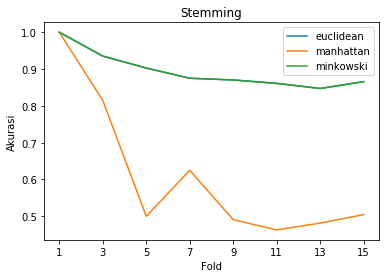

Tanpa Stemming
Nama distance= euclidean
Jumlah K tetangga= 1
Fold ke- 1 Akurasi = 1.0000 Precision = 1.0000 Recall = 1.0000 F1-Score = 1.0000
Fold ke- 2 Akurasi = 1.0000 Precision = 1.0000 Recall = 1.0000 F1-Score = 1.0000
Fold ke- 3 Akurasi = 1.0000 Precision = 1.0000 Recall = 1.0000 F1-Score = 1.0000
Fold ke- 4 Akurasi = 1.0000 Precision = 1.0000 Recall = 1.0000 F1-Score = 1.0000
Fold ke- 5 Akurasi = 1.0000 Precision = 1.0000 Recall = 1.0000 F1-Score = 1.0000
Fold ke- 6 Akurasi = 1.0000 Precision = 1.0000 Recall = 1.0000 F1-Score = 1.0000
Fold ke- 7 Akurasi = 1.0000 Precision = 1.0000 Recall = 1.0000 F1-Score = 1.0000
Fold ke- 8 Akurasi = 1.0000 Precision = 1.0000 Recall = 1.0000 F1-Score = 1.0000
Fold ke- 9 Akurasi = 1.0000 Precision = 1.0000 Recall = 1.0000 F1-Score = 1.0000
Fold ke- 10 Akurasi = 0.6204 Precision = 0.6207 Recall = 0.6204 F1-Score = 0.6168
Akurasi terbaik adalah 1.0 pada fold ke- 9
------------------------------------
Tanpa Stemming
Nama distance= euclidean
Jumlah K

Fold ke- 7 Akurasi = 1.0000 Precision = 1.0000 Recall = 1.0000 F1-Score = 1.0000
Fold ke- 8 Akurasi = 1.0000 Precision = 1.0000 Recall = 1.0000 F1-Score = 1.0000
Fold ke- 9 Akurasi = 1.0000 Precision = 1.0000 Recall = 1.0000 F1-Score = 1.0000
Fold ke- 10 Akurasi = 0.1111 Precision = 0.6811 Recall = 0.1111 F1-Score = 0.1283
Akurasi terbaik adalah 1.0 pada fold ke- 9
------------------------------------
Tanpa Stemming
Nama distance= manhattan
Jumlah K tetangga= 3
Fold ke- 1 Akurasi = 0.7593 Precision = 0.9257 Recall = 0.7593 F1-Score = 0.8609
Fold ke- 2 Akurasi = 0.7593 Precision = 0.9325 Recall = 0.7593 F1-Score = 0.7896
Fold ke- 3 Akurasi = 0.7546 Precision = 0.9321 Recall = 0.7546 F1-Score = 0.7806
Fold ke- 4 Akurasi = 0.7593 Precision = 0.9325 Recall = 0.7593 F1-Score = 0.7836
Fold ke- 5 Akurasi = 0.7778 Precision = 0.9339 Recall = 0.7778 F1-Score = 0.8175
Fold ke- 6 Akurasi = 0.7917 Precision = 0.9365 Recall = 0.7917 F1-Score = 0.7727
Fold ke- 7 Akurasi = 0.7778 Precision = 0.9354 R

Fold ke- 1 Akurasi = 0.8380 Precision = 0.8539 Recall = 0.8380 F1-Score = 0.8389
Fold ke- 2 Akurasi = 0.8148 Precision = 0.8252 Recall = 0.8148 F1-Score = 0.8137
Fold ke- 3 Akurasi = 0.8148 Precision = 0.8366 Recall = 0.8148 F1-Score = 0.8158
Fold ke- 4 Akurasi = 0.8241 Precision = 0.8463 Recall = 0.8241 F1-Score = 0.8242
Fold ke- 5 Akurasi = 0.8889 Precision = 0.8962 Recall = 0.8889 F1-Score = 0.8891
Fold ke- 6 Akurasi = 0.9398 Precision = 0.9441 Recall = 0.9398 F1-Score = 0.9397
Fold ke- 7 Akurasi = 0.9120 Precision = 0.9227 Recall = 0.9120 F1-Score = 0.9115
Fold ke- 8 Akurasi = 0.8657 Precision = 0.8800 Recall = 0.8657 F1-Score = 0.8664
Fold ke- 9 Akurasi = 0.8611 Precision = 0.8733 Recall = 0.8611 F1-Score = 0.8620
Fold ke- 10 Akurasi = 0.6620 Precision = 0.6970 Recall = 0.6620 F1-Score = 0.6657
Akurasi terbaik adalah 0.9398148148148148 pada fold ke- 6
------------------------------------
Tanpa Stemming
Nama distance= minkowski
Jumlah K tetangga= 5
Fold ke- 1 Akurasi = 0.8148 Preci

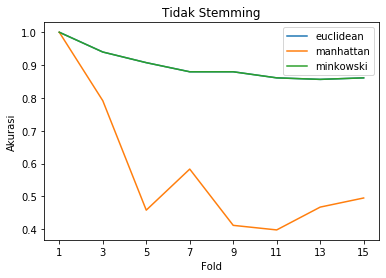

Lama Proses 831.3462362289429 seconds
Wall time: 13min 51s


In [5]:
%%time
start_time = time.time()
dfcount = [df,dfNo]
distancecount = ['euclidean','manhattan','minkowski']
kcount = [1,3,5,7,9,11,13,15]
for x in range(2):
    arrd1 = []
    arrd2 = []
    arrd3 = []
    for y in range(len(distancecount)):
        maxresult = []
        for z in range(len(kcount)):
            if x==0:
                print('Dengan Stemming')
            else:
                print('Tanpa Stemming')
            tempmax= classifier(dfcount[x],distancecount[y],kcount[z])
            maxresult.append(tempmax)
            if y==0:
                arrd1.append(tempmax)
            elif y==1:
                arrd2.append(tempmax)
            elif y==2:
                arrd3.append(tempmax)
    plt.plot(kcount, arrd1, label = "euclidean")
    plt.plot(kcount, arrd2, label = "manhattan")
    plt.plot(kcount, arrd3, label = "minkowski")
    plt.xticks(kcount)
    if x==0:
        plt.title("Stemming")
    else:
        plt.title("Tidak Stemming")
    plt.xlabel('Fold')
    plt.ylabel('Akurasi')
    plt.legend()
    plt.pause(0.05)
plt.show
print("Lama Proses %s seconds" % (time.time() - start_time))